In [1]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import random
%matplotlib inline
from preprocess_module import fraud_preprocessor 
iptrain_df, iptest_df, optrain_df, optest_df, benetrain_df, benetest_df, label_train_df, label_test_df = fraud_preprocessor(1)

In [2]:
import networkx as nx


In [3]:
ipoptrain = pd.concat([iptrain_df,optrain_df])
ipoptrain = ipoptrain.reset_index()

In [4]:
providerdf = ipoptrain[['Provider','AttendingPhysician']]
providerdf

,Provider,AttendingPhysician
0,PRV55912,PHY390922
1,PRV55907,PHY318495
2,PRV56046,PHY372395
3,PRV52405,PHY369659
4,PRV56614,PHY379376
...,...,...
558206,PRV53699,PHY364188
558207,PRV53702,PHY423019
558208,PRV53676,PHY361063
558209,PRV53689,PHY403198


In [5]:
providerdf.AttendingPhysician[providerdf.AttendingPhysician=='None'].count()

1508

In [6]:
networkdf = label_train_df 
networkdf['Color'] = ['blue' if x==0 else 'red' for x in label_train_df.PotentialFraud]
#networkdf['Label'] = label_train_df.index

networkdf.head(10)

,Provider,PotentialFraud,Color
0,PRV51001,0,blue
1,PRV51003,1,red
2,PRV51004,0,blue
3,PRV51005,1,red
4,PRV51007,0,blue
5,PRV51008,0,blue
6,PRV51011,0,blue
7,PRV51012,0,blue
8,PRV51013,0,blue
9,PRV51014,0,blue


In [7]:

#PNet.add_nodes_from(networkdf.Provider)
#pos = nx.spring_layout(G)



In [8]:
#networkdf['Physicians']=''
#networkdf['Physicians'].astype('object')
#networkdf.at[0,'Physicians']=['a','b','c','d']
#networkdf
#for ind, provider in enumerate(list(networkdf.Provider)):
#    networkdf.at[ind,'Physicians'] = list(providerdf.loc[providerdf.Provider==provider,'AttendingPhysician'])
#list(providerdf.loc[providerdf.Provider==provider,'AttendingPhysician'])

In [9]:
#physiciandf = pd.DataFrame({'Physician':providerdf.AttendingPhysician.unique()})

In [10]:
#physiciandf['ConnectedPrvd'] = ''

In [11]:
#physiciandf['ConnectedPrvd'] = physiciandf['ConnectedPrvd'].astype('object')

In [12]:
#for ind, physician in enumerate(list(physiciandf.Physician)):
#    physiciandf.at[ind, 'ConnectedPrvd'] = list(providerdf.loc[providerdf.AttendingPhysician==physician, 'Provider'])

In [13]:
#physiciandf.head(5)
#physiciandf.to_csv('physiciandf',index=False)

NameError: name 'physiciandf' is not defined

In [14]:
import pandas as pd
physiciandf = pd.read_csv('physiciandf')
physiciandf['ConnectedPrvd'] = physiciandf.ConnectedPrvd.apply(lambda x: x[2:-2].split(r"', '"))
physiciandf = physiciandf.drop(135)
physiciandf.reset_index(drop=True, inplace=True)


import networkx as nx
PNet = nx.Graph()
maxlen = 1 
sharedphysician = ''
ldf = physiciandf.shape[0]

for ind in range(ldf):
    phys_set = set(physiciandf.ConnectedPrvd[ind])
    phys_list = list(phys_set)
    L_array = len(phys_list)
    if maxlen < L_array:
        maxlen = L_array
        sharedphysician = physiciandf.Physician[ind]
        
    if L_array<2:
        continue
    else:
        for i in range(L_array):
            for j in range(i+1,L_array):
                PNet.add_edge(phys_list[i],phys_list[j])
nodecolor = []
for node in nx.nodes(PNet):
    fraud = networkdf.loc[networkdf['Provider']==node,'PotentialFraud'].values[0]
    if (fraud==0): 
        nodecolor.append('blue')
    else:
        nodecolor.append('red')


In [15]:
maxlen

9

In [16]:
sharedphysician

'PHY342165'

In [17]:
#plt.figure(figsize=(20,20))
#nx.draw_spring(PNet,node_color=nodecolor,node_size=30)

In [18]:
#pos = nx.spectral_layout(PNet) 
#plt.figure(figsize=(20,20))
#nx.draw(PNet,node_size=20,node_color=nodecolor)

In [19]:
nx.degree(PNet)

DegreeView({'PRV51086': 3, 'PRV52405': 2, 'PRV51419': 2, 'PRV51710': 5, 'PRV53374': 3, 'PRV56490': 2, 'PRV57341': 5, 'PRV57345': 3, 'PRV56559': 1, 'PRV55396': 2, 'PRV51891': 2, 'PRV51868': 6, 'PRV52150': 6, 'PRV52120': 2, 'PRV52038': 3, 'PRV52130': 4, 'PRV54653': 2, 'PRV54644': 4, 'PRV54384': 4, 'PRV54399': 6, 'PRV52985': 5, 'PRV52989': 2, 'PRV55165': 11, 'PRV52617': 2, 'PRV52689': 1, 'PRV53635': 2, 'PRV53614': 2, 'PRV55813': 1, 'PRV55687': 5, 'PRV51336': 1, 'PRV51456': 4, 'PRV52144': 3, 'PRV52152': 4, 'PRV56773': 2, 'PRV57054': 1, 'PRV56570': 2, 'PRV56668': 1, 'PRV57549': 3, 'PRV57514': 5, 'PRV57548': 7, 'PRV55435': 2, 'PRV55510': 12, 'PRV53242': 12, 'PRV53269': 7, 'PRV56647': 5, 'PRV56560': 2, 'PRV54680': 1, 'PRV54675': 1, 'PRV57415': 4, 'PRV57406': 5, 'PRV57436': 4, 'PRV57605': 2, 'PRV57523': 5, 'PRV54723': 5, 'PRV54772': 3, 'PRV56896': 1, 'PRV57711': 1, 'PRV56583': 1, 'PRV56734': 3, 'PRV52119': 2, 'PRV52019': 17, 'PRV55755': 3, 'PRV55680': 1, 'PRV57697': 3, 'PRV56574': 3, 'PRV56749

In [20]:
connectednodes = []
for node in nx.nodes(PNet):
    if nx.degree(PNet,node)>6:
        connectednodes.append(node)
    else:
        continue
connectednodes

['PRV55165',
 'PRV57548',
 'PRV55510',
 'PRV53242',
 'PRV53269',
 'PRV52019',
 'PRV52065',
 'PRV55690',
 'PRV51356',
 'PRV51012',
 'PRV56469',
 'PRV56458',
 'PRV51146',
 'PRV55243',
 'PRV55175',
 'PRV55169',
 'PRV54381',
 'PRV55676',
 'PRV54910',
 'PRV53239',
 'PRV57208',
 'PRV56454',
 'PRV56481',
 'PRV52303',
 'PRV53142',
 'PRV53120',
 'PRV56235',
 'PRV57209',
 'PRV51064',
 'PRV57101',
 'PRV53706',
 'PRV52045',
 'PRV52165',
 'PRV55205',
 'PRV56015',
 'PRV54564',
 'PRV54949',
 'PRV54230',
 'PRV55230',
 'PRV52002',
 'PRV54337',
 'PRV54382',
 'PRV56587',
 'PRV54391',
 'PRV55232',
 'PRV57501',
 'PRV51598',
 'PRV54514',
 'PRV52308',
 'PRV51089',
 'PRV51148',
 'PRV55192',
 'PRV54565',
 'PRV54580',
 'PRV56350',
 'PRV55229',
 'PRV55215',
 'PRV54992',
 'PRV55957',
 'PRV55920',
 'PRV54559',
 'PRV56243',
 'PRV53405',
 'PRV55986',
 'PRV57491',
 'PRV53104',
 'PRV55240',
 'PRV52169',
 'PRV53442',
 'PRV53121',
 'PRV55795',
 'PRV53921',
 'PRV53917',
 'PRV54658',
 'PRV56453',
 'PRV53618',
 'PRV53189',

In [21]:
subnet = PNet.subgraph(connectednodes)
nx.nodes(subnet)
subnodecolor = []
for node in nx.nodes(subnet):
    fraud = networkdf.loc[networkdf['Provider']==node,'PotentialFraud'].values[0]
    if (fraud==0): 
        subnodecolor.append('blue')
    else:
        subnodecolor.append('red')

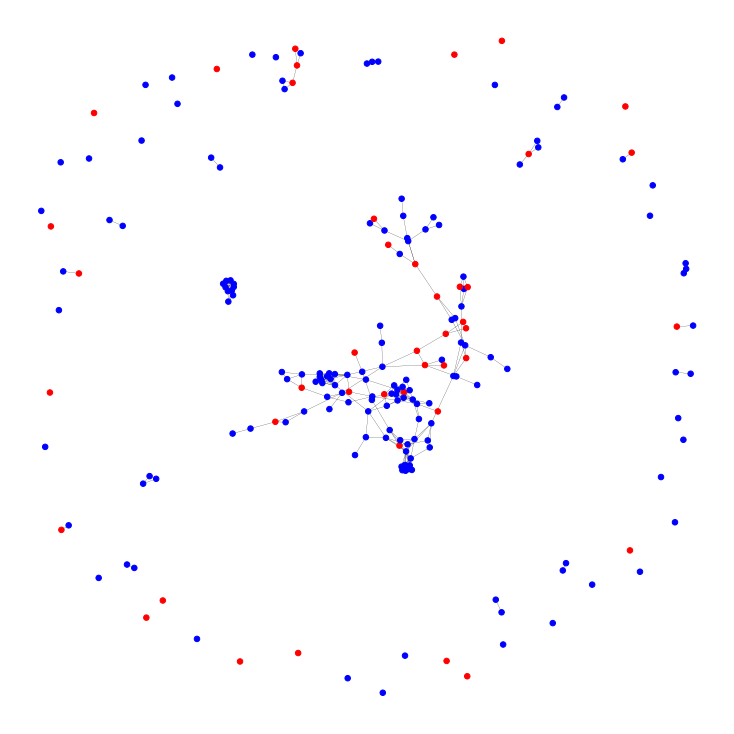

In [22]:
plt.figure(figsize=(10,10))
pos =  nx.spring_layout(subnet) 
nx.draw(subnet,pos,node_color=subnodecolor,node_size=30,width=0.2)


In [23]:
nodearray = []
degreearray = []
for node in nx.nodes(PNet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))

In [24]:
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])

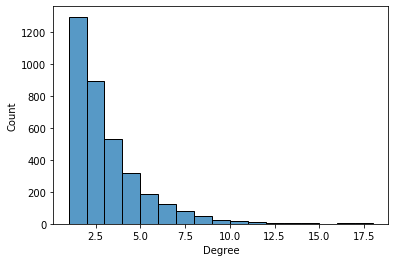

In [26]:
import seaborn as sns
sns.histplot(degreedf.Degree,binwidth=1)


In [27]:
fraudnetworkdf=pd.merge(networkdf,degreedf,'inner',on='Provider')

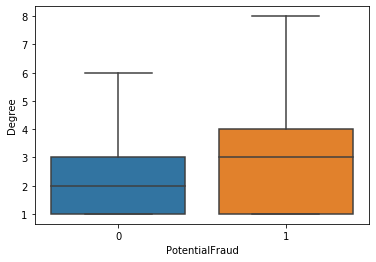

In [28]:
import seaborn as sns
sns.boxplot(x='PotentialFraud', y='Degree', data=fraudnetworkdf, showfliers=False)

In [29]:
# providers with at least one connection
fraudnetworkdf.groupby('PotentialFraud').count()

,Provider,Color,Degree
PotentialFraud,,,
0,3169,3169,3169
1,385,385,385


In [30]:
# providers with more than 5 connections 
nodearray = []
degreearray = []
for node in nx.nodes(subnet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])
fraudnetworkdf=pd.merge(networkdf,degreedf,'inner',on='Provider')
fraudnetworkdf.groupby('PotentialFraud').count()

,Provider,Color,Degree
PotentialFraud,,,
0,156,156,156
1,43,43,43


In [31]:
networkdf.groupby('PotentialFraud').count()

,Provider,Color
PotentialFraud,,
0,4904,4904
1,506,506


In [32]:
506/(506+4904)

0.09353049907578559

In [33]:
43/(156+43)

0.21608040201005024

In [34]:
385/(3169+385)

0.10832864378165448

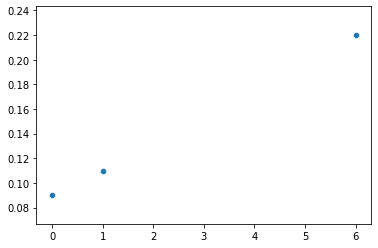

In [35]:
sns.scatterplot(x=[0, 1, 6], y=[0.09, 0.11, 0.22])

In [36]:
for node in PNet.neighbors('PRV54888'):
    print(node)

PRV55111
PRV55071
PRV55141
PRV54924
PRV54889
PRV54992
PRV55023
PRV55028
PRV55939
PRV55063
PRV54995


In [37]:

networkoutputdf = pd.merge(degreedf, networkdf, how='outer', on='Provider')[['Provider', 'Degree']]

In [38]:
networkoutputdf.fillna(0, inplace=True)

In [39]:
networkoutputdf = networkoutputdf.rename(columns={'Degree':"NetworkDegree"})

In [113]:
networkoutputdf1.to_csv('networkdf.csv',index=False)

In [41]:
networkoutputdf

,Provider,NetworkDegree
0,PRV53569,9.0
1,PRV55202,9.0
2,PRV56469,13.0
3,PRV55001,8.0
4,PRV51484,7.0
...,...,...
5405,PRV57759,0.0
5406,PRV57760,0.0
5407,PRV57761,0.0
5408,PRV57762,0.0


In [114]:
from Feature_Engineering import feature_engineering

In [115]:
features = feature_engineering()

In [116]:
features.sample(20)

,Provider,Phys_Count,Patient_Count,Claim_Count,Service_Type,Both_Service,Inpatient,Outpatient,DuplicateClaims,Duplicate_Claims_Percent,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,NetworkDegree,isFraudConnected,NoPhysicianCount
597,PRV53787,30,74,119,Both_Service,1,0,0,90,0.76,...,180,145,144,185,198,217,Yes,2.0,1.0,1.0
261,PRV51842,87,223,462,Both_Service,1,0,0,336,0.73,...,715,574,589,812,781,882,Yes,3.0,1.0,2.0
42,PRV51338,83,124,202,Both_Service,1,0,0,148,0.73,...,308,257,241,333,329,375,Yes,1.0,1.0,0.0
112,PRV51460,65,413,663,Both_Service,1,0,0,422,0.64,...,1059,887,830,1120,1140,1282,No,2.0,0.0,2.0
1017,PRV56008,5,686,2220,Outpatient,0,0,1,1704,0.77,...,3496,2874,2725,3732,3731,4206,Yes,0.0,0.0,2.0
315,PRV52038,85,217,425,Both_Service,1,0,0,332,0.78,...,658,537,522,697,716,821,No,3.0,0.0,0.0
330,PRV52061,50,121,210,Outpatient,0,0,1,158,0.75,...,318,283,266,343,329,402,No,5.0,0.0,0.0
40,PRV51336,39,69,100,Both_Service,1,0,0,62,0.62,...,154,121,128,171,168,189,No,1.0,0.0,0.0
283,PRV51936,18,20,32,Outpatient,0,0,1,24,0.75,...,48,39,42,53,54,57,No,1.0,0.0,0.0
668,PRV54238,4,153,458,Outpatient,0,0,1,222,0.48,...,711,565,528,742,741,835,No,1.0,0.0,0.0


In [117]:
features.to_csv('Features.csv',index=False)

In [76]:
nodearray = []
degreearray = []
for node in nx.nodes(PNet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])

In [78]:
fraudconnected = np.zeros(degreedf.shape[0])
fraudconnected.size


3554

In [79]:
degreedf1 = pd.merge(degreedf, networkdf, how='inner', on='Provider')[['Provider', 'Degree','PotentialFraud']]

In [80]:
for ind, node in enumerate(degreedf1.Provider):
    for neighbor in PNet.neighbors(node):
        if fraudconnected[ind] == 0 and degreedf1.loc[degreedf1['Provider']==node,'PotentialFraud'].values[0] == 1:
            fraudconnected[ind] = 1
            ind1 = degreedf1.loc[degreedf1['Provider']==node,'PotentialFraud'].index[0]
            fraudconnected[ind1] = 1
        else:
            continue


In [82]:
fraudconnected.sum()

385.0

In [83]:
networkdf.loc[networkdf['PotentialFraud']==1,:] # about 385 out of 506 were detected through network analysis 

,Provider,PotentialFraud,Color
1,PRV51003,1,red
3,PRV51005,1,red
13,PRV51021,1,red
25,PRV51037,1,red
37,PRV51052,1,red
...,...,...,...
5307,PRV57642,1,red
5324,PRV57667,1,red
5329,PRV57672,1,red
5351,PRV57697,1,red


In [84]:
degreedf1['isFraudConnected'] = fraudconnected

In [85]:
networkoutputdf1 = pd.merge(degreedf1, networkdf, how='outer', on='Provider')[['Provider', 'Degree','isFraudConnected']]
networkoutputdf1.fillna(0, inplace=True)
networkoutputdf1 = networkoutputdf1.rename(columns={'Degree':"NetworkDegree"})

In [89]:
networkoutputdf1.sample(20)

,Provider,NetworkDegree,isFraudConnected
838,PRV54638,2.0,0.0
1314,PRV51691,4.0,0.0
2770,PRV51360,1.0,0.0
2708,PRV55003,3.0,0.0
4093,PRV52796,0.0,0.0
3681,PRV51496,0.0,0.0
5358,PRV57650,0.0,0.0
221,PRV57251,1.0,0.0
2081,PRV52013,1.0,0.0
3125,PRV54938,1.0,0.0


In [96]:
providerdf.loc[providerdf.Provider=='PRV52847','AttendingPhysician']=='None'

537       PHY377532
819       PHY394465
1182      PHY394465
2293      PHY358920
3109      PHY394465
            ...    
435365    PHY391110
468620    PHY343604
484170    PHY363393
516853    PHY427962
520652    PHY335811
Name: AttendingPhysician, Length: 92, dtype: object

In [107]:
(providerdf.loc[providerdf.Provider=='PRV54986','AttendingPhysician']=='None').sum()

2

In [103]:
(providerdf.loc[providerdf.AttendingPhysician=='None',:])

,Provider,AttendingPhysician
147,PRV56253,None
335,PRV56276,None
855,PRV54894,None
868,PRV54561,None
1335,PRV54986,None
...,...,...
557049,PRV56606,None
557528,PRV52064,None
557804,PRV57104,None
557857,PRV52850,None


In [109]:
NoPhysician = np.zeros(networkoutputdf1.shape[0])
for ind, provider in enumerate(networkoutputdf1.Provider):
    NoPhysician[ind] = (providerdf.loc[providerdf.Provider==provider,'AttendingPhysician']=='None').sum()
        


In [110]:
networkoutputdf1['NoPhysicianCount'] = NoPhysician

In [112]:
networkoutputdf1.sample(30)

,Provider,NetworkDegree,isFraudConnected,NoPhysicianCount
3659,PRV51387,0.0,0.0,0.0
3009,PRV51877,1.0,0.0,0.0
3454,PRV57366,1.0,0.0,1.0
2147,PRV51453,2.0,0.0,0.0
1456,PRV54350,3.0,1.0,5.0
1080,PRV53764,3.0,0.0,0.0
5056,PRV56463,0.0,0.0,0.0
2002,PRV53453,1.0,0.0,0.0
238,PRV52466,1.0,0.0,0.0
106,PRV51077,4.0,1.0,0.0
